## Autoencoders

![alt text](https://cdn-images-1.medium.com/max/1818/1*8ixTe1VHLsmKB3AquWdxpQ.png)

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
encoding_dim = 49
input_img = Input(shape=(784,))

#encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)

#decoded - reconstruction of its encoded representation
decoded = Dense(784, activation='sigmoid')(encoded)

#this model maps an input to its encoded representation
autoencoder = Model(input_img, decoded)

#seperate encoder model
encoder = Model(input_img, encoded)

#placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))

#retrive the last layer of the auto-encoder model
decoder_layer = autoencoder.layers[-1]

#create a decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 49)                38465     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2595 - val_loss: 0.1781
Epoch 2/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.1565 - val_loss: 0.1376
Epoch 3/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.1287 - val_loss: 0.1185
Epoch 4/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.1137 - val_loss: 0.1068
Epoch 5/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.1038 - val_loss: 0.0985
Epoch 6/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0966 - val_loss: 0.0926
Epoch 7/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0913 - val_loss: 0.0881
Epoch 8/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0876 - val_loss: 0.0852
Epoch 9/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.0851 - val_loss: 0.0832
Epoch

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

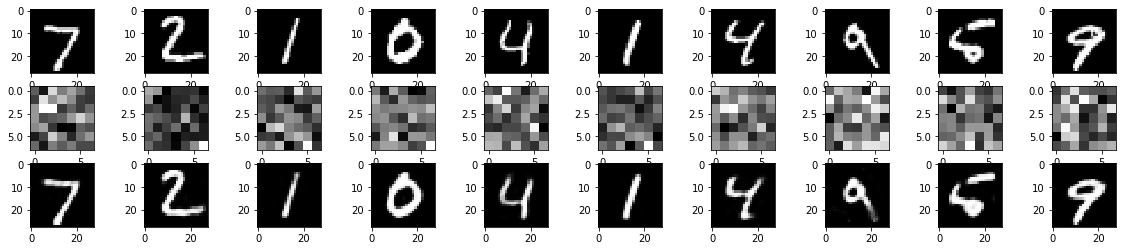

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(7, 7), cmap='gray')
    
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

### Deep Autoencoder

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.3942 - val_loss: 0.2642
Epoch 2/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2600 - val_loss: 0.2565
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2518 - val_loss: 0.2452
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2389 - val_loss: 0.2333
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2278 - val_loss: 0.2224
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2180 - val_loss: 0.2106
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2068 - val_loss: 0.1987
Epoch 8/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1952 - val_loss: 0.1919
Epoch 9/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1877 - val_loss: 0.1830
Epoc

### Convolution Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [0]:
input_img = Input(shape=(28, 28, 1)) 

In [0]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [0]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

ValueError: ignored